In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

from helpers import toy_data, show_samples, make_animation
from glash_v2 import glash_discriminator, glash_generator, Glash

2021-12-16 19:05:24.738066: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
mean = (1, 1)
cov = [[1, 0], [0, 1]] # Should be symmetric
x = np.random.multivariate_normal(mean, cov, 1000).astype('float32')

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1.95202374e+00, -1.89290778e+00, -1.83379181e+00, -1.77467585e+00,
        -1.71555988e+00, -1.65644392e+00, -1.59732795e+00, -1.53821199e+00,
        -1.47909602e+00, -1.41998006e+00, -1.36086409e+00, -1.30174813e+00,
        -1.24263216e+00, -1.18351619e+00, -1.12440023e+00, -1.06528426e+00,
        -1.00616830e+00, -9.47052333e-01, -8.87936368e-01, -8.28820403e-01,
        -7.69704437e-01, -7.10588472e-01, -6.51472507e-01, -5.92356541e-01,
        -5.33240576e-01, -4.74124610e-01, -4.15008645e-01, -3.55892680e-01,
        -2.96776714e-01, -2.37660749e-01, -1.78544784e-01, -1.19428818e-01,
        -6.03128529e-02, -1.19688749e-03,  5.79190779e-02,  1.17035043e-01,
         1.76151009e-01,  2.35266974e-01,  2.94382939e-01,  3.53498

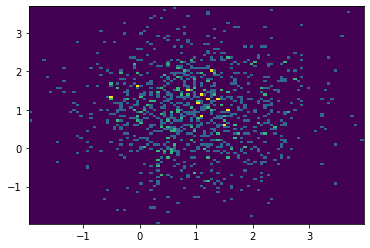

In [4]:
plt.hist2d(x[:, :1].reshape(1000,), x[:, 1:2].reshape(1000,), bins=100)

In [5]:
train_data = tf.data.Dataset.from_tensor_slices(x)
train_data = train_data.batch(64).prefetch(32)

2021-12-16 19:05:26.451505: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-16 19:05:26.452260: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-16 19:05:26.496746: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-16 19:05:26.497033: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2021-12-16 19:05:26.497047: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-12-16 19:05:26.498116: I tensorflow/stream_executor/platform/defa

In [8]:
glash = Glash(glash_discriminator(), glash_generator())
glash.compile(
    tf.keras.optimizers.Adam(),
    tf.keras.optimizers.Adam(),
    tf.keras.losses.BinaryCrossentropy(from_logits=True)
)

In [9]:
generated_point_list = []

cbk = tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: show_samples(generated_point_list, epoch, glash.generator, x))

history = glash.fit(train_data, epochs=3000, callbacks=[cbk], verbose=True)

Epoch 1/3000


2021-12-16 19:05:27.772505: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-16 19:05:27.795934: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz
2021-12-16 19:05:27.888096: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


16/16 [==============================] - 1s 2ms/step - d_loss: 1.5552 - g_loss: 2.2370
Epoch 2/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 1.4273 - g_loss: 1.5109
Epoch 3/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 1.3148 - g_loss: 1.0224
Epoch 4/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 1.1981 - g_loss: 0.8037
Epoch 5/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 1.0860 - g_loss: 0.6777
Epoch 6/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.9778 - g_loss: 0.6233
Epoch 7/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.8917 - g_loss: 0.5747
Epoch 8/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.8280 - g_loss: 0.5433
Epoch 9/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.7849 - g_loss: 0.5255
Epoch 10/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.7641 - g_loss: 0.5009
Epoch 11/300

16/16 [==============================] - 0s 2ms/step - d_loss: 0.6833 - g_loss: 0.7093
Epoch 163/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.6201 - g_loss: 0.8330
Epoch 164/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5535 - g_loss: 0.9440
Epoch 165/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5248 - g_loss: 0.9583
Epoch 166/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5442 - g_loss: 0.8939
Epoch 167/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.6169 - g_loss: 0.7879
Epoch 168/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.6784 - g_loss: 0.7486
Epoch 169/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.6718 - g_loss: 0.8548
Epoch 170/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.6127 - g_loss: 0.9939
Epoch 171/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5573 - g_loss: 1.

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5725 - g_loss: 0.8453
Epoch 323/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5578 - g_loss: 0.9065
Epoch 324/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5608 - g_loss: 0.9351
Epoch 325/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5691 - g_loss: 0.9942
Epoch 326/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5849 - g_loss: 1.0251
Epoch 327/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5971 - g_loss: 1.0431
Epoch 328/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.6041 - g_loss: 1.0723
Epoch 329/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5979 - g_loss: 1.0750
Epoch 330/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5780 - g_loss: 1.0576
Epoch 331/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5614 - g_loss: 1.

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5602 - g_loss: 0.9547
Epoch 483/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5619 - g_loss: 0.8900
Epoch 484/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5826 - g_loss: 0.8279
Epoch 485/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5874 - g_loss: 0.8260
Epoch 486/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5779 - g_loss: 0.8724
Epoch 487/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5738 - g_loss: 0.9300
Epoch 488/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5758 - g_loss: 0.9960
Epoch 489/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5850 - g_loss: 0.9951
Epoch 490/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5791 - g_loss: 0.9810
Epoch 491/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5721 - g_loss: 0.

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5734 - g_loss: 0.9068
Epoch 643/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5730 - g_loss: 0.9132
Epoch 644/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5730 - g_loss: 0.9029
Epoch 645/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5740 - g_loss: 0.8827
Epoch 646/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5737 - g_loss: 0.8884
Epoch 647/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5733 - g_loss: 0.8821
Epoch 648/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5731 - g_loss: 0.8911
Epoch 649/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5731 - g_loss: 0.8941
Epoch 650/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5733 - g_loss: 0.8815
Epoch 651/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5731 - g_loss: 0.

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5566 - g_loss: 0.9620
Epoch 803/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5585 - g_loss: 0.9175
Epoch 804/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5629 - g_loss: 0.8766
Epoch 805/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5754 - g_loss: 0.8350
Epoch 806/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5773 - g_loss: 0.8356
Epoch 807/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5804 - g_loss: 0.8022
Epoch 808/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5973 - g_loss: 0.7780
Epoch 809/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5667 - g_loss: 0.8429
Epoch 810/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5613 - g_loss: 0.8714
Epoch 811/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5680 - g_loss: 0.

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5683 - g_loss: 0.9855
Epoch 963/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5667 - g_loss: 1.0226
Epoch 964/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5673 - g_loss: 1.0432
Epoch 965/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5721 - g_loss: 1.0247
Epoch 966/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5743 - g_loss: 1.0020
Epoch 967/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5726 - g_loss: 0.9637
Epoch 968/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5677 - g_loss: 0.9273
Epoch 969/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5686 - g_loss: 0.8775
Epoch 970/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5726 - g_loss: 0.8226
Epoch 971/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5713 - g_loss: 0.

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5708 - g_loss: 0.8565
Epoch 1043/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5671 - g_loss: 0.8857
Epoch 1044/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5681 - g_loss: 0.9180
Epoch 1045/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5723 - g_loss: 0.9275
Epoch 1046/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5761 - g_loss: 0.9268
Epoch 1047/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5732 - g_loss: 0.9655
Epoch 1048/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5649 - g_loss: 0.9548
Epoch 1049/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5664 - g_loss: 0.9058
Epoch 1050/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5722 - g_loss: 0.8513
Epoch 1051/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5784 - g

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5696 - g_loss: 0.8948
Epoch 1201/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5715 - g_loss: 0.8673
Epoch 1202/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5723 - g_loss: 0.8667
Epoch 1203/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5715 - g_loss: 0.8640
Epoch 1204/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5697 - g_loss: 0.8774
Epoch 1205/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5689 - g_loss: 0.8958
Epoch 1206/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5683 - g_loss: 0.9088
Epoch 1207/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5721 - g_loss: 0.9268
Epoch 1208/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5723 - g_loss: 0.9408
Epoch 1209/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5703 - g

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5693 - g_loss: 0.8948
Epoch 1359/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5697 - g_loss: 0.8928
Epoch 1360/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5699 - g_loss: 0.8993
Epoch 1361/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5703 - g_loss: 0.8882
Epoch 1362/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5696 - g_loss: 0.8771
Epoch 1363/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5695 - g_loss: 0.8852
Epoch 1364/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5690 - g_loss: 0.8918
Epoch 1365/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5698 - g_loss: 0.9102
Epoch 1366/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5699 - g_loss: 0.9256
Epoch 1367/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5700 - g

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5692 - g_loss: 0.8426
Epoch 1517/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5712 - g_loss: 0.8730
Epoch 1518/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5713 - g_loss: 0.9099
Epoch 1519/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5705 - g_loss: 0.9233
Epoch 1520/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5703 - g_loss: 0.9316
Epoch 1521/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5714 - g_loss: 0.9148
Epoch 1522/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5692 - g_loss: 0.9035
Epoch 1523/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5694 - g_loss: 0.9031
Epoch 1524/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5705 - g_loss: 0.9058
Epoch 1525/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5695 - g

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5704 - g_loss: 0.8968
Epoch 1675/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5697 - g_loss: 0.8935
Epoch 1676/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5696 - g_loss: 0.8914
Epoch 1677/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5695 - g_loss: 0.8994
Epoch 1678/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5701 - g_loss: 0.9132
Epoch 1679/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5687 - g_loss: 0.9280
Epoch 1680/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5690 - g_loss: 0.9107
Epoch 1681/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5688 - g_loss: 0.8915
Epoch 1682/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5696 - g_loss: 0.8912
Epoch 1683/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5702 - g

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5688 - g_loss: 0.8973
Epoch 1833/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5689 - g_loss: 0.8972
Epoch 1834/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5688 - g_loss: 0.8870
Epoch 1835/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5693 - g_loss: 0.8827
Epoch 1836/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5699 - g_loss: 0.8806
Epoch 1837/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5689 - g_loss: 0.8796
Epoch 1838/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5681 - g_loss: 0.9003
Epoch 1839/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5683 - g_loss: 0.9132
Epoch 1840/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5675 - g_loss: 0.9243
Epoch 1841/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5684 - g

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5684 - g_loss: 0.8899
Epoch 1991/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5691 - g_loss: 0.8845
Epoch 1992/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5692 - g_loss: 0.8796
Epoch 1993/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5768 - g_loss: 0.8677
Epoch 1994/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5696 - g_loss: 0.8873
Epoch 1995/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5686 - g_loss: 0.8919
Epoch 1996/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5690 - g_loss: 0.8990
Epoch 1997/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5701 - g_loss: 0.9051
Epoch 1998/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5704 - g_loss: 0.9116
Epoch 1999/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5698 - g

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5689 - g_loss: 0.9019
Epoch 2149/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5709 - g_loss: 0.9098
Epoch 2150/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5708 - g_loss: 0.9192
Epoch 2151/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5692 - g_loss: 0.9281
Epoch 2152/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5680 - g_loss: 0.9344
Epoch 2153/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5660 - g_loss: 0.9478
Epoch 2154/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5669 - g_loss: 0.9362
Epoch 2155/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5684 - g_loss: 0.9031
Epoch 2156/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5697 - g_loss: 0.8866
Epoch 2157/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5707 - g

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5710 - g_loss: 0.9073
Epoch 2307/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5690 - g_loss: 0.9075
Epoch 2308/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5693 - g_loss: 0.9137
Epoch 2309/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5691 - g_loss: 0.9055
Epoch 2310/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5697 - g_loss: 0.9140
Epoch 2311/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5695 - g_loss: 0.9034
Epoch 2312/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5693 - g_loss: 0.8970
Epoch 2313/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5685 - g_loss: 0.8959
Epoch 2314/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5680 - g_loss: 0.8956
Epoch 2315/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5686 - g

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5686 - g_loss: 0.9125
Epoch 2465/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5702 - g_loss: 0.8917
Epoch 2466/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5709 - g_loss: 0.8816
Epoch 2467/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5705 - g_loss: 0.8735
Epoch 2468/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5694 - g_loss: 0.8748
Epoch 2469/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5703 - g_loss: 0.8862
Epoch 2470/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5698 - g_loss: 0.8916
Epoch 2471/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5696 - g_loss: 0.9023
Epoch 2472/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5699 - g_loss: 0.9207
Epoch 2473/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5668 - g

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5693 - g_loss: 0.8531
Epoch 2623/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5695 - g_loss: 0.8725
Epoch 2624/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5698 - g_loss: 0.8887
Epoch 2625/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5690 - g_loss: 0.9079
Epoch 2626/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5691 - g_loss: 0.9217
Epoch 2627/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5699 - g_loss: 0.9314
Epoch 2628/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5699 - g_loss: 0.9241
Epoch 2629/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5701 - g_loss: 0.9174
Epoch 2630/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5699 - g_loss: 0.9217
Epoch 2631/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5698 - g

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5694 - g_loss: 0.8987
Epoch 2781/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5696 - g_loss: 0.9129
Epoch 2782/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5687 - g_loss: 0.9241
Epoch 2783/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5703 - g_loss: 0.9377
Epoch 2784/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5648 - g_loss: 0.9260
Epoch 2785/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5678 - g_loss: 0.8888
Epoch 2786/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5696 - g_loss: 0.8920
Epoch 2787/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5689 - g_loss: 0.8966
Epoch 2788/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5686 - g_loss: 0.9119
Epoch 2789/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5694 - g

16/16 [==============================] - 0s 2ms/step - d_loss: 0.5654 - g_loss: 0.9546
Epoch 2939/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5689 - g_loss: 0.9496
Epoch 2940/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5682 - g_loss: 0.9295
Epoch 2941/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5722 - g_loss: 0.8876
Epoch 2942/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5700 - g_loss: 0.8729
Epoch 2943/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5673 - g_loss: 0.8606
Epoch 2944/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5682 - g_loss: 0.8528
Epoch 2945/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5670 - g_loss: 0.8621
Epoch 2946/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5667 - g_loss: 0.8615
Epoch 2947/3000
16/16 [==============================] - 0s 2ms/step - d_loss: 0.5676 - g

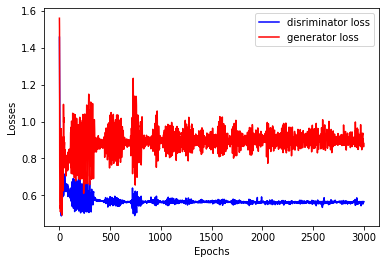

In [10]:
plt.plot(history.history['d_loss'], color='blue', label='disriminator loss')
plt.plot(history.history['g_loss'], color='red', label='generator loss')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()

In [11]:
noise = toy_data(1000, 0, 1).astype('float32')
noise.shape

(1000, 2)

In [12]:
np.random.uniform(0,1,(1000,5))

array([[0.13509361, 0.40756274, 0.87039045, 0.93596614, 0.4651981 ],
       [0.85756547, 0.70504392, 0.39220676, 0.43232264, 0.2260721 ],
       [0.32504274, 0.85327317, 0.66801236, 0.73564906, 0.36822149],
       ...,
       [0.21040495, 0.56884341, 0.21770006, 0.94475527, 0.12562618],
       [0.06587551, 0.31577514, 0.78551669, 0.22397868, 0.1770383 ],
       [0.25362029, 0.96921776, 0.09382115, 0.00575617, 0.02201247]])

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  1.,  3.,  0.,  1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  2.,  3.,  0.,  3.,  2.,  1.,  3.,  2.,  2.,
          0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  4.,  0.,  6.,  3.,  3.,  1.,  2.,  5.,  2.,
          2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  1.,  2.,  3.,  6.,  4.,  4.,  5.,  4.,  1.,
          0.,  1.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  3.,  1.,  2.,  2.,  7.,  7.,  7.,  5.,  4.,  4.,
          4.,  3.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  2.,  3.,  4.,  6.,  2.,  4.,  6.,  3., 11.,  6.,  3.,
          2.,  2.,  3.,  3.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  2.,  2.,  3.,  3.,  4.,  3.,  4.,  6.,  6.,  4.,  7.,
          3.,  7.,  4.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.

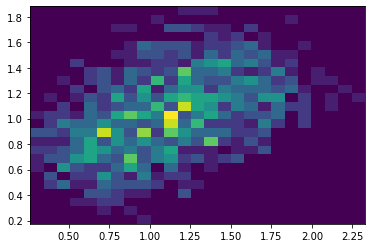

In [13]:
test = glash(np.random.uniform(0,1,(1000,5)))
x_test = tf.reshape(test[:, :1], (1000,))
y_test = tf.reshape(test[:, 1:2], (1000,))

plt.hist2d(x_test, y_test, bins=25)

(array([ 8., 15., 17., 29., 33., 45., 61., 47., 50., 64., 61., 46., 69.,
        69., 56., 56., 49., 38., 34., 32., 45., 29., 17., 13.,  9.,  3.,
         2.,  1.,  1.,  1.]),
 array([0.26314908, 0.33194795, 0.40074685, 0.46954572, 0.5383446 ,
        0.6071435 , 0.67594236, 0.74474126, 0.81354016, 0.882339  ,
        0.9511379 , 1.0199368 , 1.0887357 , 1.1575346 , 1.2263334 ,
        1.2951323 , 1.3639312 , 1.4327301 , 1.501529  , 1.5703279 ,
        1.6391268 , 1.7079256 , 1.7767245 , 1.8455234 , 1.9143223 ,
        1.9831212 , 2.05192   , 2.120719  , 2.1895177 , 2.2583168 ,
        2.3271155 ], dtype=float32),
 <BarContainer object of 30 artists>)

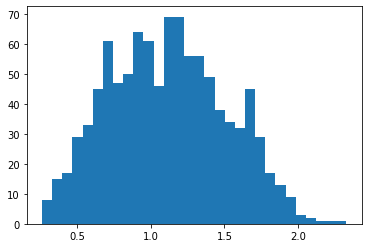

In [14]:
a = x_test.numpy()
plt.hist(a, bins=30)

(array([ 1.,  2.,  3.,  7., 14., 20., 22., 28., 39., 46., 54., 54., 69.,
        62., 73., 66., 70., 65., 53., 48., 44., 48., 28., 31., 27.,  4.,
        10.,  7.,  2.,  3.]),
 array([0.17453507, 0.23142974, 0.28832442, 0.34521908, 0.40211374,
        0.45900843, 0.5159031 , 0.5727978 , 0.62969244, 0.6865871 ,
        0.74348176, 0.8003765 , 0.85727113, 0.9141658 , 0.97106045,
        1.0279552 , 1.0848498 , 1.1417445 , 1.1986392 , 1.2555338 ,
        1.3124285 , 1.3693231 , 1.4262178 , 1.4831125 , 1.5400071 ,
        1.5969019 , 1.6537966 , 1.7106912 , 1.7675859 , 1.8244805 ,
        1.8813752 ], dtype=float32),
 <BarContainer object of 30 artists>)

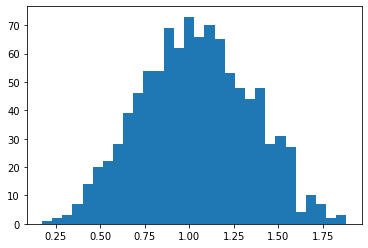

In [15]:
b = y_test.numpy()
plt.hist(b, bins=30)